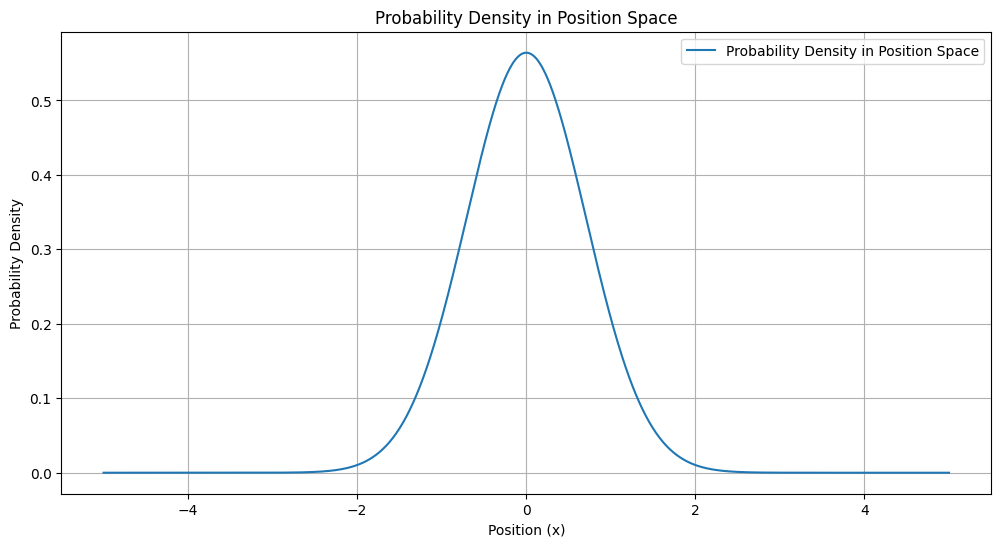

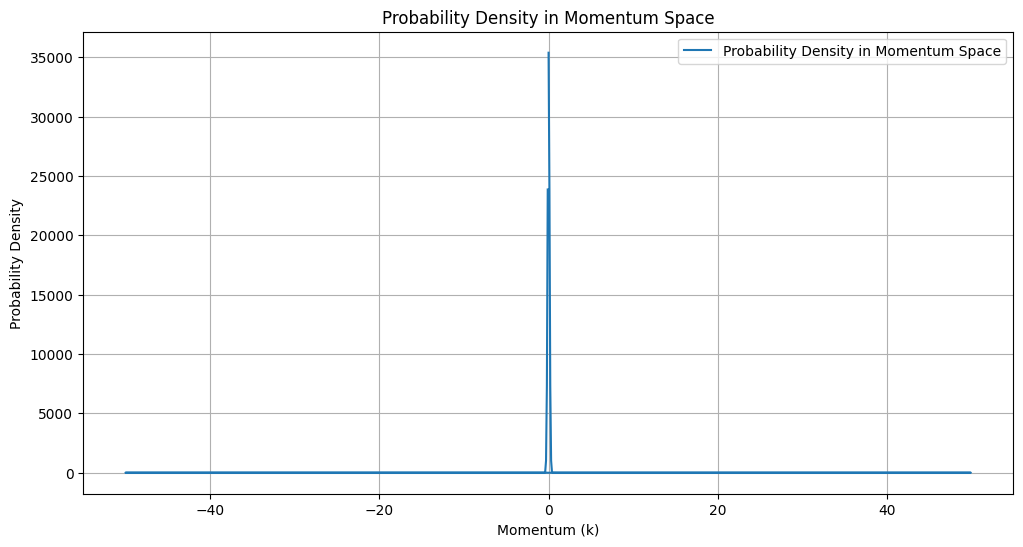

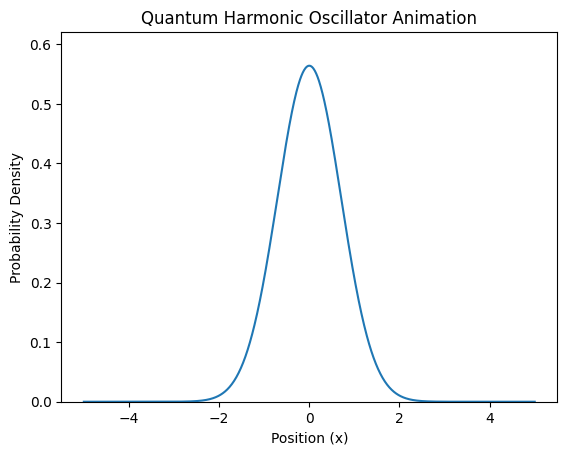

0: ──RX(1.99)─┤  State  <X>  <Y>  <Z>


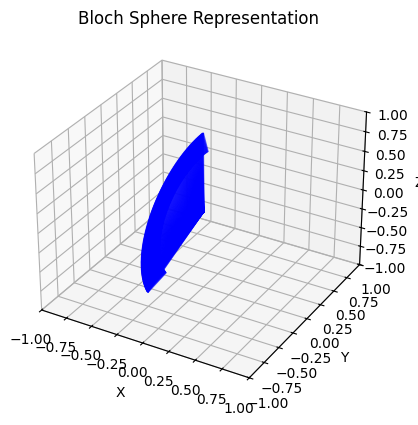

In [2]:
# This body of code illustrates the quantum evolution of the state of a single qubit using the Blochsphere
# Developed by: Dr. Michael P. Haydock - IBM Fellow Emeritus - Data & Optimization Sciences, Inc.
# Initial Coding: 2/11/2025

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

# Parameters for the Gaussian wave packet
sigma = 1.0  # Width of the wave packet
xmax = 5.0
N = 1000
x = np.linspace(-xmax, xmax, N)
dx = x[1] - x[0]

# Define the Gaussian wave packet
psi_x = np.exp(-x**2 / (2 * sigma**2))
psi_x /= np.sqrt(np.sum(psi_x**2) * dx)  # Normalize the wave function

# Compute the probability density in position space
probability_density_x = np.abs(psi_x)**2

# Perform the Fourier Transform to get the wave function in momentum space
psi_k = fft(psi_x)
k = fftfreq(N, dx)

# Compute the probability density in momentum space
probability_density_k = np.abs(psi_k)**2

# Plot the probability density in position space
plt.figure(figsize=(12, 6))
plt.plot(x, probability_density_x, label='Probability Density in Position Space')
plt.xlabel('Position (x)')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Probability Density in Position Space')
plt.grid(True)
plt.show()

# Plot the probability density in momentum space
plt.figure(figsize=(12, 6))
plt.plot(k, probability_density_k, label='Probability Density in Momentum Space')
plt.xlabel('Momentum (k)')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Probability Density in Momentum Space')
plt.grid(True)
plt.show()

# Define the Pennylane device
dev = qml.device("default.qubit", wires=1)

# Define the QNode for the quantum harmonic oscillator
@qml.qnode(dev)
def harmonic_oscillator(params):
    qml.RX(params[0], wires=0)
    return qml.state(), qml.expval(qml.PauliX(0)), qml.expval(qml.PauliY(0)), qml.expval(qml.PauliZ(0))

# Time evolution parameters
mass = 1.0
omega = 1.0
hbar = 1.0
dt = 0.01
T = 2.0
num_steps = int(T / dt)

# Define the potential energy for the harmonic oscillator
V = 0.5 * mass * omega**2 * x**2

# Initialize the wave function (Gaussian wave packet)
psi0 = np.exp(-0.5 * (x / 0.5)**2)
psi0 /= np.sqrt(np.sum(psi0**2) * dx)  # Normalize the wave function

# Time evolution of the wave function
params = np.array([0.0])
psi = np.zeros((num_steps, N), dtype=complex)
bloch_vectors = np.zeros((num_steps, 3))
psi[0] = psi_x

for n in range(1, num_steps):
    params[0] = n * dt
    state, x_exp, y_exp, z_exp = harmonic_oscillator(params)
    bloch_vectors[n] = [x_exp, y_exp, z_exp]
    psi[n] = psi[0] * state[0]  # Apply the quantum operation to the initial wave function

# Create a figure and axis for the animation
fig, ax = plt.subplots()
line, = ax.plot(x, np.abs(psi[0])**2)

# Function to update the frame
def update(frame):
    y = np.abs(psi[frame])**2
    line.set_ydata(y)
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=num_steps, blit=True, interval=20)

# Set plot parameters
ax.set_ylim(0, np.max(np.abs(psi)**2) * 1.1)
ax.set_xlabel('Position (x)')
ax.set_ylabel('Probability Density')
ax.set_title('Quantum Harmonic Oscillator Animation')

# Display the animation
plt.show()

# Draw the quantum circuit
drawer = qml.draw(harmonic_oscillator)
print(drawer(params))

# Plot the Bloch sphere representation
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"})
for vec in bloch_vectors:
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color='b', alpha=0.6)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Bloch Sphere Representation")
plt.show()

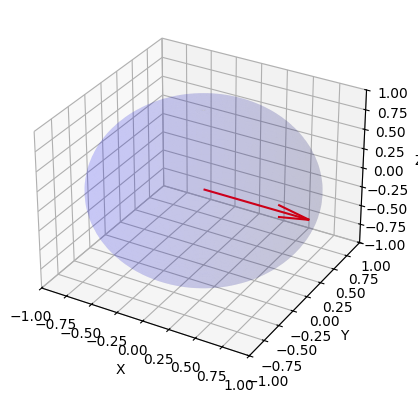

In [1]:
# Another illustration of the Bloch Sphere 
# Developed by: Dr. Michael P. Haydock - IBM Fellow Emeritus - Visiting Professor, St. Olaf College
# Initial Coding: 2/19/2025

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialize a single qubit device
dev = qml.device('default.qubit', wires=1)

# Define a quantum circuit with Hadamard gate
@qml.qnode(dev)
def hadamard_circuit():
    qml.Hadamard(wires=0)
    return [qml.expval(qml.PauliX(0)), qml.expval(qml.PauliY(0)), qml.expval(qml.PauliZ(0))]

# Execute the circuit
bloch_vector = hadamard_circuit()

# Plot the Bloch sphere
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Draw sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='b', alpha=0.1)

# Draw Bloch vector
ax.quiver(0, 0, 0, bloch_vector[0], bloch_vector[1], bloch_vector[2], color='r')

# Set labels
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()